<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-CarlosAlbertoNievesPerez/blob/main/Semana_8_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARLOS ALBERTO NIEVES PEREZ
A01018796

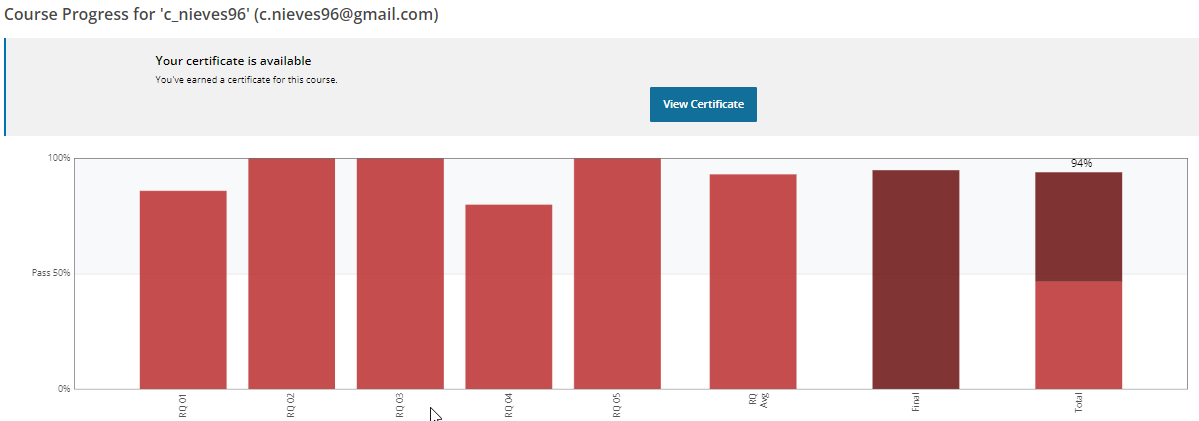

#MODEL EVALUATION

Model Evaluation tells us how our model preforms in the real world.

In-sample evaluation tells us how well our model fits the data already given to train
it.

It does not give us an estimate of how well the trained model can predict new data.

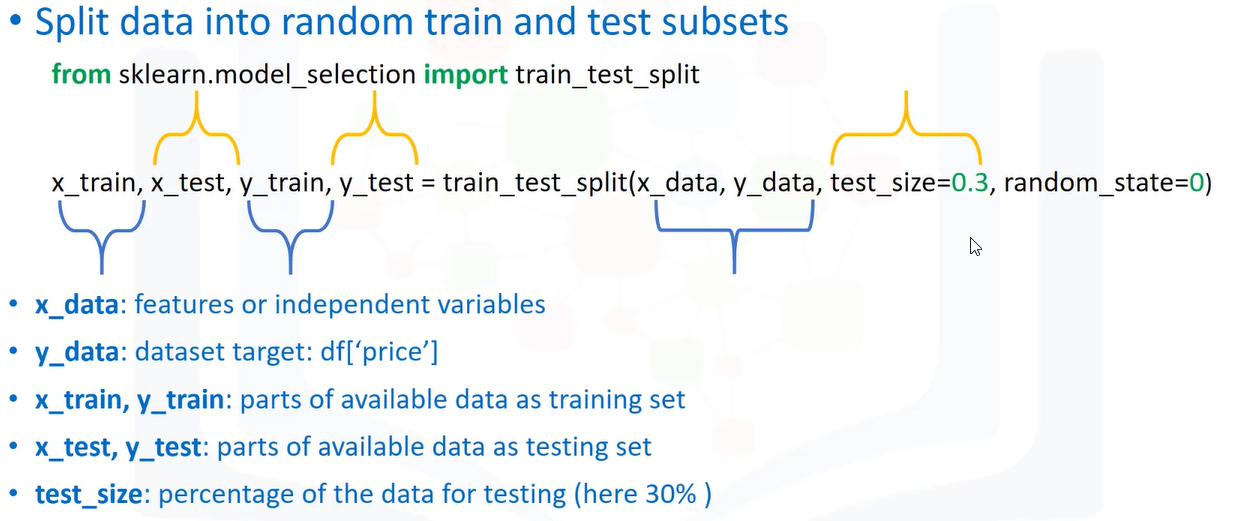

##Generalization error

Is a measure of how well our data does at prediciting previousle unseen data

The error we obtain using our testing data is an approximation of this error.

##Cross Validation

The mos common out-of-sample evaluation metrics

More effective use of data (each observation is used for both training and testing)

The Simplest way to apply cross validation is to call the cross_val_score() function,
which performs multiple 'out-of-sample' evaluations.
This method is imported from sklearn's model selection package.

##MODEL SELECTION

###UNDERFITTING

The goal of model selection is to determine the order of the polynomial to provide the
best estimate of the function y x.

If we try and fit the function with a linear function, the line is not complex enough to
fit the data.
As a result, there are many errors.
This is called under-fitting, where the model is too simple to fit the data.

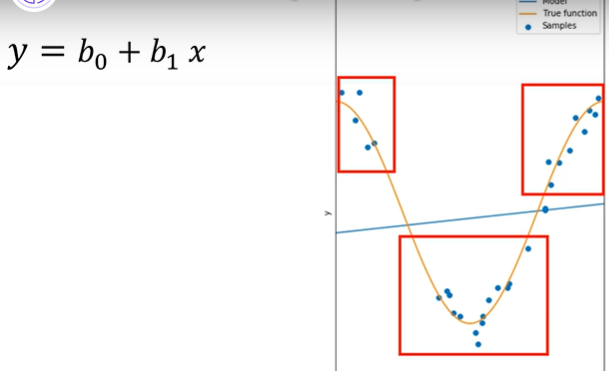

      La linea azul representa una regresion lineal y la amarilla una polinomial.

      podemos ver que la polinomial fits better.

      Incluso si nos vamos polinomial a la 8 fitts aun better

###OVER FITTING 

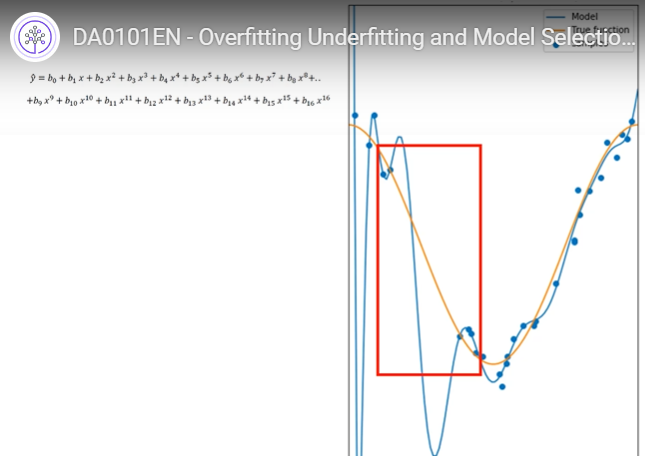

Increasing it to a 16th order polynomial, the model does extremely well at tracking
the training points, but performs poorly at estimating the function.

This is especially apparent where there is little training data; the estimated function
oscillates not tracking the function.

This is called over-fitting, where the model is too flexible and fits the noise rather
than the function.

###MEAN SAQUARE ERROR PLOT

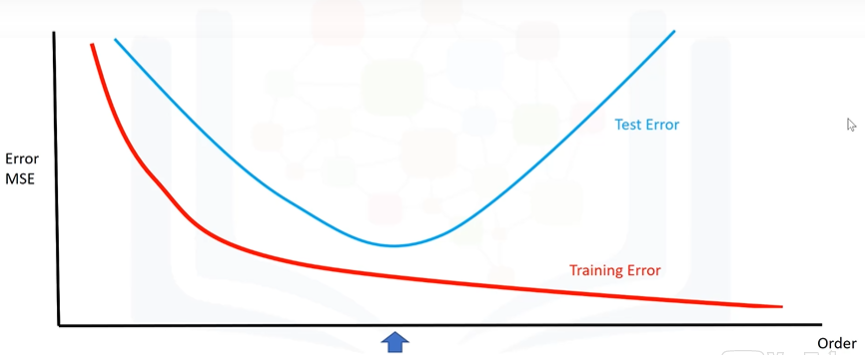

Let's look at a plot of the mean square error for the training and testing set for different
order polynomials.

The horizontal axis represents the order of the polynomial; the vertical axis is the mean
square error.

The training error decreases with the order of the polynomial.

The test error is a better means of estimating the error of a polynomial. The error decreases
till the best order of the polynomial is determined, then the error begins to increase.
We select the order that minimizes the test error, in this case, it was 8.

Lo que se encuentra del aldo izquierdo de la flecha es underfitting y lo que
esta a lado dereche es overfitting

La sevaracion entre el valle de la linea azul y el x axis, es el noise

###R SQUARED PLOT

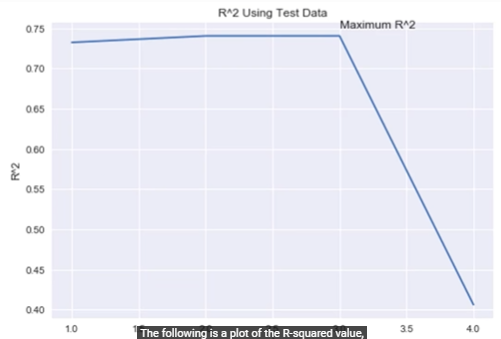

The closer the R-squared is to 1, the more accurate the model is.
Here we see the R-squared is optimal when the order of the polynomial is three.

The R-squared drastically decreases when the order is increased to 4, validating our initial
assumption.

Esto lo podemos calcular con el siguiente codigo:

      1. Creamos una lista vacia para guardar los valores
          Rsqu_test=[]

      2. Creamos una lista con diferentes ordenes polinomialies
          order=[1,2,3,4]

      3. Iteramos con un loop
          for n in order:

          pr=PolynomialFeatures(degree=n)

          x_train_pr=pr.fit_transform(x_train[['horsepower']])

          x_test:pr=pr.fit_transform(x_test[['horsepower']])

          lr.fit(x_train_pr,y_train)

          Rsqu_test.append(lr.score(x_test_pr,y_test))

##Ridge Regression

It prevents overfitting

Ridge regression controls the magnitude of these polynomial coefficients by introducing
the parameter alpha.

Alpha is a parameter we select before fitting or training the model.

En otras palabras, al meter alpha, se reduce la magnitud de los coeficientes
de la regresion polinomial

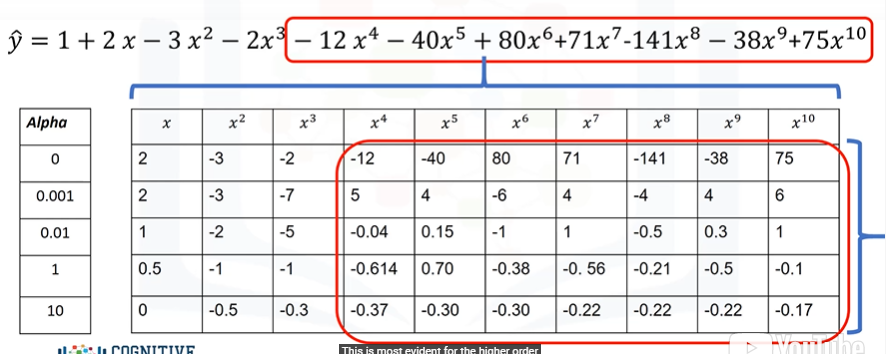

As alpha increases, the parameters get smaller.

This is most evident for the higher order polynomial features, but alpha must be selected
carefully.

If alpha is too large, the coefficients will approach zero and under-fit the data.

If alpha is zero, the over-fitting is evident.

For alpha equal to 0.001, the over fitting begins to subside.

For alpha equal to 0.01, the estimated function tracks the actual function.

When alpha equals 1, we see the first signs of under-fitting.

The estimated function does not have enough flexibility.

At alpha equals to 10, we see extreme under-fitting; it does not even track the two points.

In order to select alpha we use CROSS-VALIDATION

Para hacer una prediccion usando ridge regression, usamos el siguiente codigo:

      from sklearn.linear_model import Ridge

      RigeModel=Ridge(alpha=.1)

      RigeModel.fit(X,y)

      Yhat=RigeModel.predict(X)

##GRID SEARCH

Grid search allows us to scan through multiple free parameters with few lines of code.


Parameters like the alpha term discussed in the previous video are not part of the fitting

or training process.

These values are called hyperparameters.

Scikit-learn has a means of automatically iterating over these hyperparameters using

cross-validation.

his method is called Grid search.

Grid search takes the model or objects you would like to train and different values of

the hyperparameters.

It then calculates the mean square error or R squared for various hyperparameter values,

allowing you to choose the best values.

We select the hyperparameter that minimizes the mean squared error or maximizes the
R squared on the validation set.

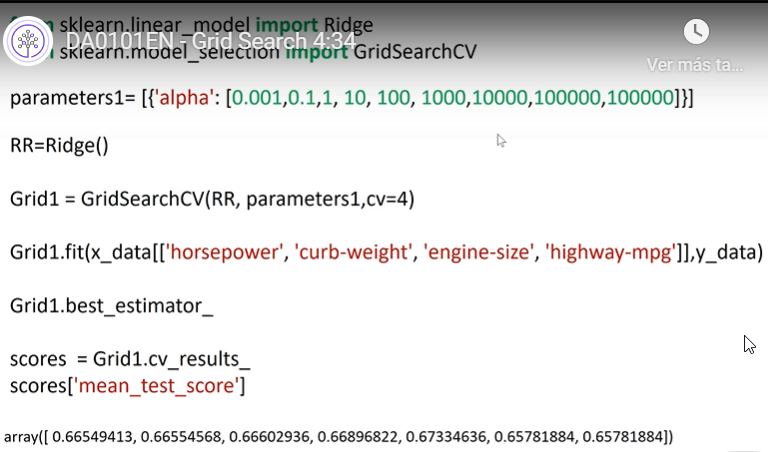

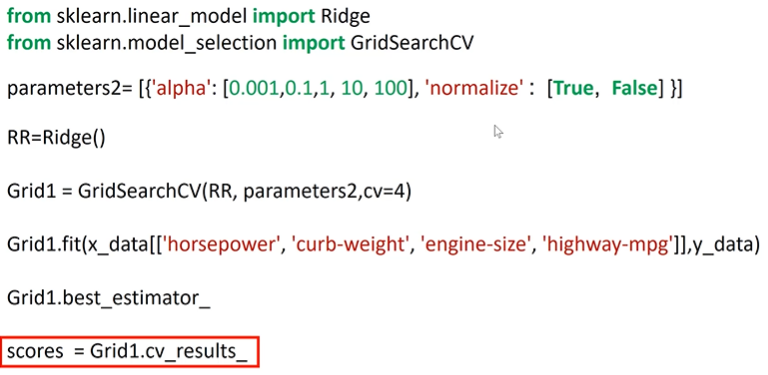